In [1]:
import pandas as pd

In [2]:
# Veri setini yükleyelim
file_path = 'creditcard_2023.csv'  # Veri setini yerel bilgisayardan ya da Kaggle API ile çekebilirsin
df = pd.read_csv(file_path)

In [3]:
# İlk birkaç satırı görüntüleyelim
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [4]:
# Veri setindeki sütunları ve veri türlerini kontrol edelim
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
# Eksik değerleri kontrol edelim
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Eksik değerlerin özetini kontrol edelim
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Eğer varsa eksik değerleri gösterir

Series([], dtype: int64)


In [7]:
# Eğer eksik değerler varsa, bunları ortalama (mean) ile dolduralım
# Bu işlem, eksik değerler sayısının az olduğu varsayımıyla yapılır
df.fillna(df.mean(), inplace=True)

In [8]:
# Eksik değerlerin doldurulduğunu tekrar kontrol edelim
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Adım 3: Aykırı Değerlerin Tespiti ve İşlenmesi

In [10]:
import seaborn as sns # Veri görselleştirme için
import matplotlib.pyplot as plt # Veri görselleştirme için
# seaborn ve matplotlib kütüphanelerini kullanarak veri setindeki özelliklerin dağılımlarını ve aykırı değerlerini görselleştireceğiz

In [11]:
# Özelliklerin dağılımlarını ve olası aykırı değerleri görmek için boxplot kullanalım
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 

<Figure size 1500x1000 with 0 Axes>

In [12]:
# Aykırı değerlerin sayısının çok fazla olup olmadığını kontrol edelim
# Özellikle sayısal özelliklerde aykırı değerlere odaklanacağız
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    print(f"Column: {col}") # Sütun adı
    print(f"Skewness: {df[col].skew()}") # Asimetri (skewness) değeri
    print(f"Kurtosis: {df[col].kurt()}") # Basıklık (kurtosis) değeri
    print('-'*40)



Column: id
Skewness: -6.579535783947936e-16
Kurtosis: -1.2
----------------------------------------
Column: V1
Skewness: -0.08341717301015879
Kurtosis: -0.19551088568279074
----------------------------------------
Column: V2
Skewness: -1.397951923713946
Kurtosis: 54.50647846202814
----------------------------------------
Column: V3
Skewness: 0.014622213363246254
Kurtosis: 0.28868614603280385
----------------------------------------
Column: V4
Skewness: -0.04416892714770696
Kurtosis: -0.10335451793576445
----------------------------------------
Column: V5
Skewness: 1.5064136757634041
Kurtosis: 47.09935165702095
----------------------------------------
Column: V6
Skewness: -0.2016110101307477
Kurtosis: 4.4905101732511685
----------------------------------------
Column: V7
Skewness: 19.026866097533325
Kurtosis: 4017.608217329162
----------------------------------------
Column: V8
Skewness: 0.2999722258586845
Kurtosis: 18.939201932362025
----------------------------------------
Column: V9


In [13]:
# Aykırı değerlerin tespitine göre aykırı değerleri filtreleyelim veya işleyelim
# Örneğin, interquartile range (IQR) yöntemi ile aykırı değerleri tespit edip çıkaralım
Q1 = df[numeric_columns].quantile(0.25) # 1. çeyrek
Q3 = df[numeric_columns].quantile(0.75) # 3. çeyrek
IQR = Q3 - Q1


In [14]:
df_clean = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) |(df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Aykırı değerlerden temizlenmiş veri boyutu: {df_clean.shape}")

Aykırı değerlerden temizlenmiş veri boyutu: (326711, 31)


Adım 4: Veri Ölçeklendirme

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seçimimize göre ölçeklendirme yöntemi kullanabiliriz.
# Normalizasyon: Min-Max ölçeklendirme ile 0-1 arasına
scaler = MinMaxScaler()

# Ya da Standartlaştırma: Ortalaması 0, standart sapması 1 olacak şekilde
# scaler = StandardScaler()

scaled_features = scaler.fit_transform(df_clean[numeric_columns])

# Ölçeklenmiş verileri orijinal dataframe'e ekleyelim
df_clean[numeric_columns] = scaled_features
print("Ölçeklendirilmiş veriler:")
print(df_clean.head())

Ölçeklendirilmiş veriler:
         id        V1        V2        V3        V4        V5        V6  \
0  0.000000  0.326174  0.443321  0.987371  0.615320  0.519161  0.687281   
1  0.000002  0.663331  0.483218  0.487970  0.533954  0.569455  0.606618   
3  0.000005  0.355538  0.429515  0.794273  0.378592  0.560023  0.796075   
4  0.000007  0.340743  0.550213  0.737643  0.529570  0.511127  0.633642   
5  0.000009  0.403566  0.558911  0.651091  0.468489  0.621758  0.614669   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.620530  0.439988  0.605062  ...  0.419473  0.560016  0.440343  0.526154   
1  0.585547  0.436740  0.506664  ...  0.352359  0.344008  0.576542  0.388727   
3  0.620299  0.507696  0.363320  ...  0.390542  0.492903  0.389965  0.145481   
4  0.663995  0.353725  0.688702  ...  0.422311  0.694370  0.423263  0.553257   
5  0.649138  0.478997  0.463480  ...  0.358083  0.361649  0.493948  0.378714   

        V25       V26       V27       V28 

C:\Users\eminc\AppData\Local\Temp\ipykernel_16828\238758318.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numeric_columns] = scaled_features


Adım 5: Modelleme

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hedef ve özellikleri ayıralım
X = df_clean.drop(columns=['Class'])  # 'Class' sütunu hedef (fraud/non-fraud)
y = df_clean['Class']


In [18]:

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-NN modelini oluşturalım
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapalım
y_pred = knn.predict(X_test)

# Model performansını değerlendirelim
print(f"Doğruluk Skoru: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Doğruluk Skoru: 0.9993572346807599
Confusion Matrix:
[[63355    56]
 [    7 34596]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     63411
         1.0       1.00      1.00      1.00     34603

    accuracy                           1.00     98014
   macro avg       1.00      1.00      1.00     98014
weighted avg       1.00      1.00      1.00     98014



Adım 6: Sonuçların Analizi ve Görselleştirme

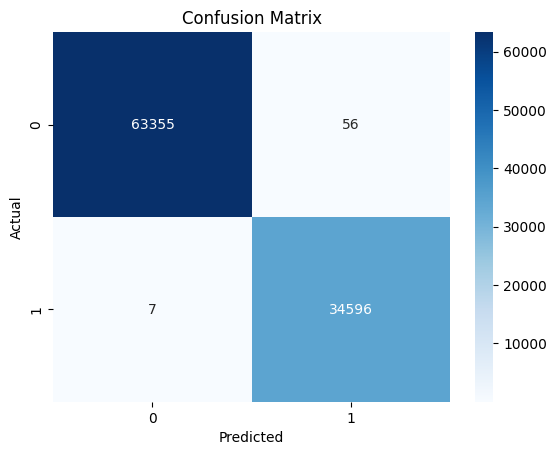

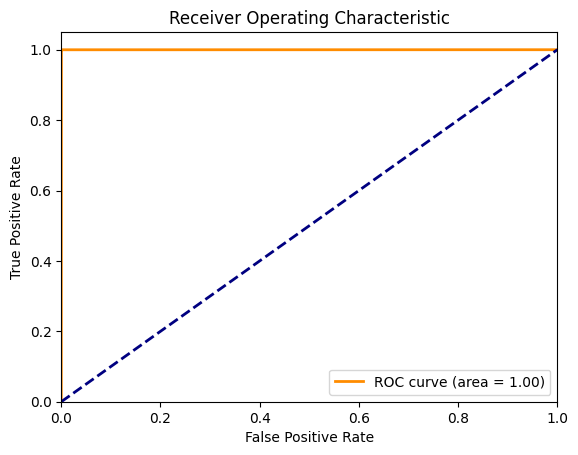

In [19]:
from sklearn.metrics import roc_curve, auc

# Confusion Matrix'in görselleştirilmesi
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Eğrisi ve AUC
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
